# Tutorial 2 - scientific Python ecosystem: `pandas` and `GeoPandas`

In this tutorial we will learn using 

 1. `pandas` DataFrames
 2. `GeoPandas` GeoDataFrames

within PyGMT

## 0. General stuff

Import required packages

In [1]:
import numpy as np
import pygmt
import pandas as pd
import geopandas as gpd

## 1. `pandas`

`pandas.DataFrame`

## 2. `GeoPandas`

Different datasets are available from: https://github.com/GenericMappingTools/pygmt/issues/2786#issuecomment-1787655589

### 2.1 Point and line geometries

Download data

In [2]:
gpd_rivers_org = gpd.read_file(
    "https://www.eea.europa.eu/data-and-maps/data/wise-large-rivers-and-large-lakes/" + \
    "zipped-shapefile-with-wise-large-rivers-vector-line/zipped-shapefile-with-wise-large-rivers-vector-line/" + \
    "at_download/file/wise_large_rivers.zip"
)
gpd_rivers_org

,NAME,Shape_Leng,geometry
0,Danube,2.770357e+06,"MULTILINESTRING ((4185683.29 2775788.04, 41861..."
1,Douro,8.162452e+05,"MULTILINESTRING ((2764963.81 2199037.624, 2766..."
2,Ebro,8.269909e+05,"MULTILINESTRING ((3178371.814 2315100.781, 317..."
3,Elbe,1.087288e+06,"MULTILINESTRING ((4235352.373 3422319.986, 423..."
4,Guadalquivir,5.997583e+05,"MULTILINESTRING ((2859329.283 1682737.074, 286..."
5,Guadiana,1.063055e+06,"MULTILINESTRING ((2778234.118 1742652.788, 277..."
6,Loire,9.447554e+05,"LINESTRING (3404499.642 2762382.497, 3421698.5..."
7,Nemunas,6.892096e+05,"LINESTRING (5035572.495 3631760.803, 5047544.3..."
8,Odra,8.237538e+05,"MULTILINESTRING ((4624553.768 3398503.656, 462..."
9,Rhine,1.159962e+06,"MULTILINESTRING ((4042308.092 3212055.887, 404..."


Convert to coordinate system / reference system

In [3]:
gpd_rivers_org.crs
gpd_rivers = gpd_rivers_org.to_crs('EPSG:4326')
gpd_rivers

,NAME,Shape_Leng,geometry
0,Danube,2.770357e+06,"MULTILINESTRING ((8.1846 48.0807, 8.19049 48.0..."
1,Douro,8.162452e+05,"MULTILINESTRING ((-8.67141 41.14934, -8.64362 ..."
2,Ebro,8.269909e+05,"MULTILINESTRING ((-4.05971 42.97715, -4.06841 ..."
3,Elbe,1.087288e+06,"MULTILINESTRING ((8.69715 53.90109, 8.72716 53..."
4,Guadalquivir,5.997583e+05,"MULTILINESTRING ((-6.37899 36.80363, -6.34806 ..."
5,Guadiana,1.063055e+06,"MULTILINESTRING ((-7.39821 37.17202, -7.39569 ..."
6,Loire,9.447554e+05,"LINESTRING (-2.17075 47.295, -1.9385 47.2884, ..."
7,Nemunas,6.892096e+05,"LINESTRING (21.29464 55.28538, 21.46636 55.218..."
8,Odra,8.237538e+05,"MULTILINESTRING ((14.589 53.60762, 14.58954 53..."
9,Rhine,1.159962e+06,"MULTILINESTRING ((5.94425 51.94878, 5.95764 51..."


Plot data

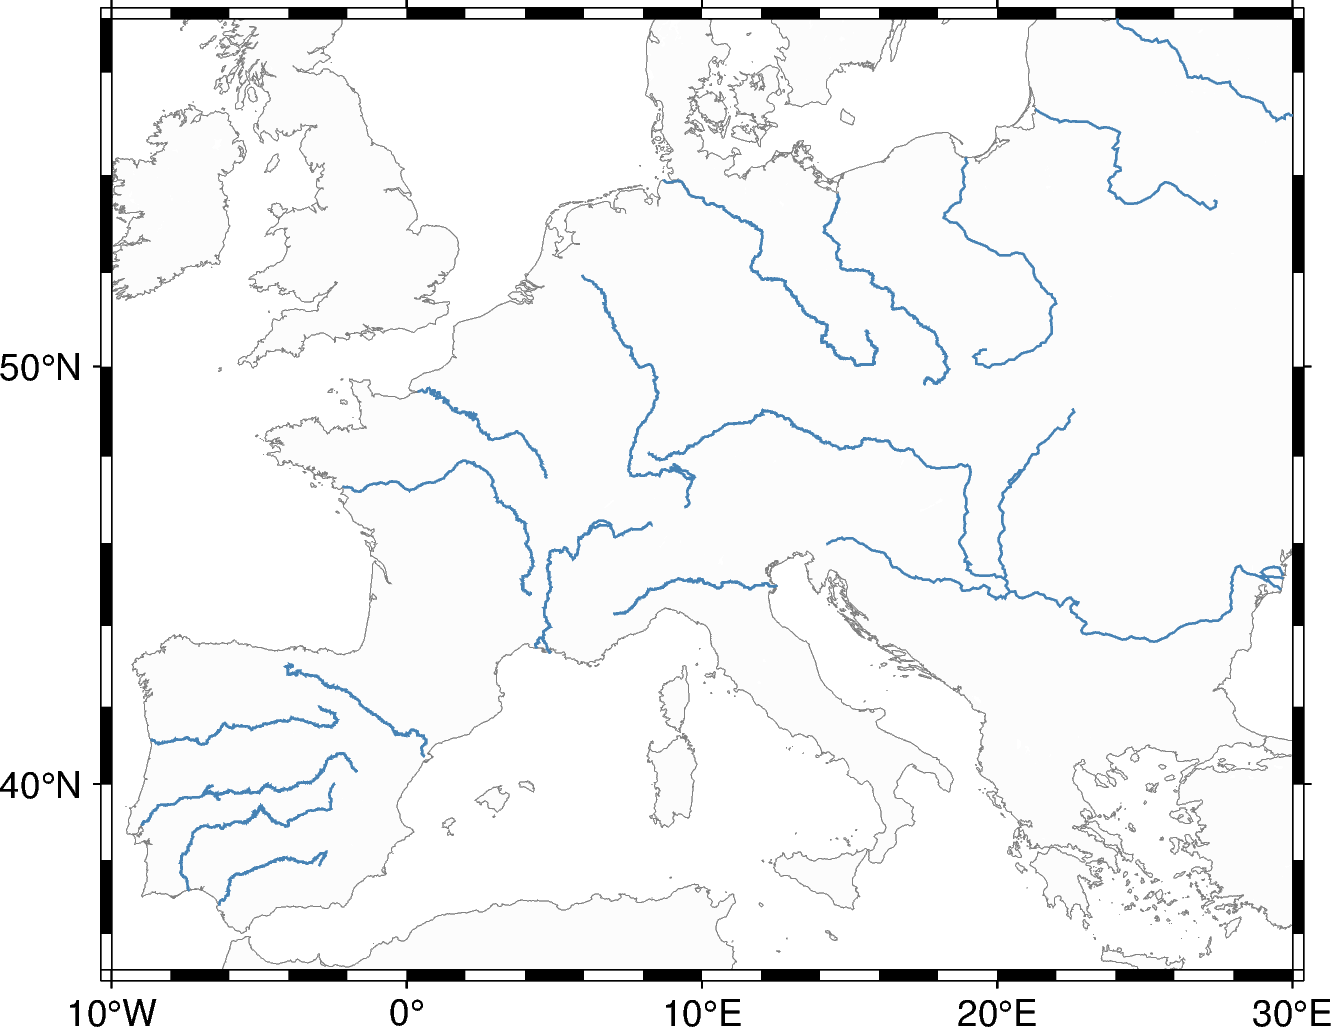

In [4]:
fig = pygmt.Figure()

fig.coast(
    projection="M10c", 
    region=[-10, 30, 35, 57],
    land="gray99",
    shorelines="1/0.1p,gray50",
    frame=True,
)

fig.plot(data=gpd_rivers, pen="0.5p,steelblue")

fig.show()

Filter and plot data differently

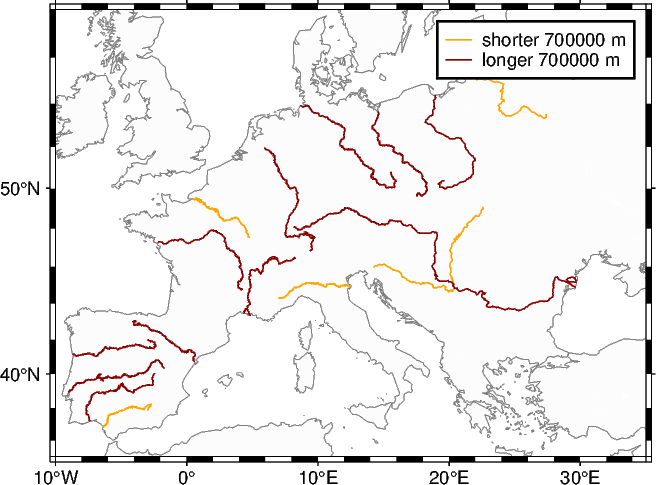

In [5]:
fig = pygmt.Figure()

fig.coast(
    projection="M10c", 
    region=[-10, 35, 35, 58],
    land="gray99",
    shorelines="1/0.1p,gray50",
    frame=True,
)
    
len_limit = 700000
gpd_rivers_short = gpd_rivers[gpd_rivers["Shape_Leng"] < len_limit]
gpd_rivers_long = gpd_rivers[gpd_rivers["Shape_Leng"] > len_limit]

fig.plot(data=gpd_rivers_short, pen="0.5p,orange", label=f"shorter {len_limit} m")
fig.plot(data=gpd_rivers_long, pen="0.5p,darkred", label=f"longer {len_limit} m")

fig.legend()

fig.show(dpi=150)

Use a colormap to indicate length of the reviers

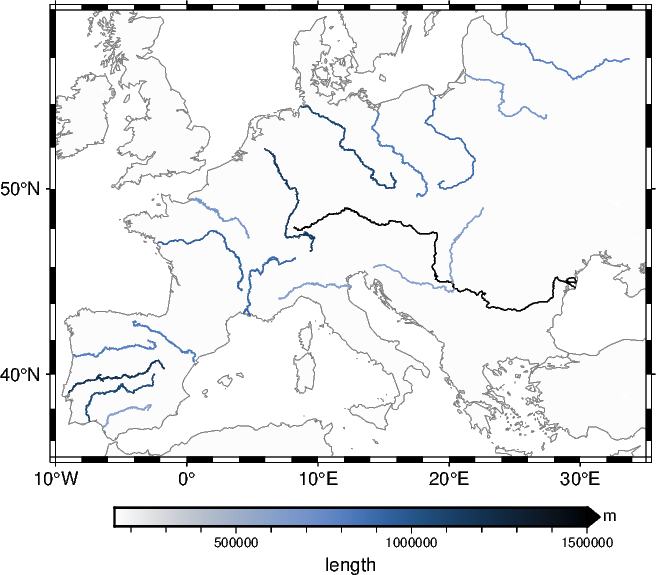

In [6]:
fig = pygmt.Figure()

fig.coast(
    projection="M10c", 
    region=[-10, 35, 35, 58],
    land="gray99",
    shorelines="1/0.01p,gray50",
    frame=True,
)

pygmt.makecpt(
    cmap="oslo",
    series=[gpd_rivers.Shape_Leng.min(), 1500000],
    reverse=True,
)
fig.colorbar(frame=["x+llength", "y+lm"], position="+ef0.2c")

for i_river in range(len(gpd_rivers)):
    fig.plot(
        data=gpd_rivers[gpd_rivers.index==i_river],
        zvalue=gpd_rivers.loc[i_river, "Shape_Leng"],
        pen="0.5p",
        cmap=True,
    )

fig.show(dpi=150)

### 2.2 Polygon geometry: Creating a choropleth map

Used in / ideas of this example
* plot with fill="+z" and aspatial parameter
* choropleth map: maybe higher-level method see PR https://github.com/GenericMappingTools/pygmt/pull/2798
* Data stored in geopandas GeoDataFrame
* built-in data of geopandas: deprecated see issue https://github.com/GenericMappingTools/pygmt/issues/2786

Download data

In [7]:
gdf_airbnb = gpd.read_file("https://geodacenter.github.io/data-and-lab//data/airbnb.zip")
gdf_airbnb

,community,shape_area,shape_len,AREAID,response_r,accept_r,rev_rating,price_pp,room_type,num_spots,...,crowded,dependency,without_hs,unemployed,income_pc,harship_in,num_crimes,num_theft,population,geometry
0,DOUGLAS,46004621.1581,31027.0545098,35,98.771429,94.514286,87.777778,78.157895,1.789474,38,...,1.8,30.7,14.3,18.2,23791,47,5013,1241,18238,"POLYGON ((-87.60914 41.84469, -87.60915 41.844..."
1,OAKLAND,16913961.0408,19565.5061533,36,99.200000,90.105263,88.812500,53.775000,1.850000,20,...,1.3,40.4,18.4,28.7,19252,78,1306,311,5918,"POLYGON ((-87.59215 41.81693, -87.59231 41.816..."
2,FULLER PARK,19916704.8692,None,37,68.000000,NaN,91.750000,84.000000,1.833333,6,...,3.2,44.9,26.6,33.9,10432,97,1764,383,2876,"POLYGON ((-87.6288 41.80189, -87.62879 41.8017..."
3,GRAND BOULEVARD,48492503.1554,28196.8371573,38,94.037037,83.615385,92.750000,119.533333,1.533333,30,...,3.3,39.5,15.9,24.3,23472,57,6416,1428,21929,"POLYGON ((-87.60671 41.81681, -87.6067 41.8165..."
4,KENWOOD,29071741.9283,23325.1679062,39,92.542857,88.142857,90.656250,77.991453,1.615385,39,...,2.4,35.4,11.3,15.7,35911,26,2713,654,17841,"POLYGON ((-87.59215 41.81693, -87.59215 41.816..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,MOUNT GREENWOOD,75584290.0209,48665.1305392,74,NaN,NaN,NaN,NaN,NaN,0,...,1.0,36.8,4.3,8.7,34381,16,1233,326,19093,"POLYGON ((-87.69646 41.70714, -87.69644 41.706..."
73,MORGAN PARK,91877340.6988,46396.419362,75,85.500000,96.666667,97.000000,67.933333,1.000000,5,...,0.8,40.3,10.8,15.0,27149,30,3998,912,22544,"POLYGON ((-87.64215 41.68508, -87.64249 41.685..."
74,OHARE,371835607.687,173625.98466,76,83.500000,100.000000,83.000000,38.500000,2.500000,2,...,3.6,30.3,10.9,7.1,25828,24,3423,1011,12756,"MULTIPOLYGON (((-87.83658 41.9864, -87.83658 4..."
75,EDGEWATER,48449990.8397,31004.8309456,77,94.429530,85.925676,94.540323,77.199510,1.582353,170,...,4.1,23.8,9.7,9.2,33385,19,4559,1409,56521,"POLYGON ((-87.65456 41.99817, -87.65456 41.998..."


Plot data

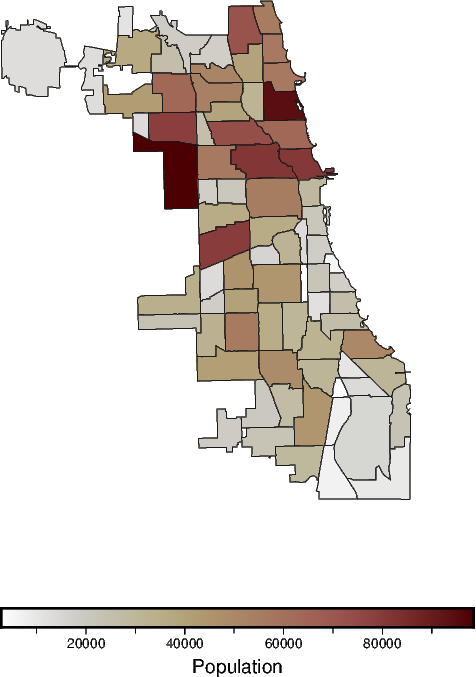

In [8]:
# Create figure
fig = pygmt.Figure()
fig.basemap(region=[-88, -87.4, 41.6, 42.05], projection="M10c", frame="rltb")

# Set up colormap
pygmt.makecpt(
    cmap="bilbao", series=[np.min(gdf_airbnb["population"]), np.max(gdf_airbnb["population"]), 10],
)
# Add colorbar
fig.colorbar(frame="x+lPopulation")

# Plot 
fig.plot(
    data=gdf_airbnb, 
    pen="0.2p,gray10", 
    fill="+z", 
    cmap=True,
    aspatial="Z=population",
)

fig.show(dpi=150)

### 3. Additional tasks and comments

Some interesting aspects:

- Convert other objects to `pandas` or `GeoPandas` objects to make them usable in PyGMT
- Combination with `shapely` to create more complex geometries (i.e. `from shapely.geometry import Polygon`)
- Use sutiable colormaps (F. Crameri publication)
- Use similarly with DataFrames from xyz  

### 4. References

